In [48]:
import pandas as pd
import numpy as np
df = pd.read_csv("Market_Basket_Optimisation.csv", sep=",", header= None )

from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [49]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Convert the DataFrame into a one-hot encoded format
# Stack all rows into a single list, drop NaN, and create a pivot table
basket = df.stack().reset_index(drop=True).str.strip()  # Combine and clean data
unique_items = basket.dropna().unique()  # Get all unique items

# Generate one-hot encoded DataFrame
one_hot = pd.DataFrame(
    {item: df.apply(lambda row: item in row.values, axis=1) for item in unique_items}
)

# Display the transformed DataFrame
print(one_hot.head())

   shrimp  almonds  avocado  vegetables mix  green grapes  whole weat flour  \
0    True     True     True            True          True              True   
1   False    False    False           False         False             False   
2   False    False    False           False         False             False   
3   False    False     True           False         False             False   
4   False    False    False           False         False             False   

    yams  cottage cheese  energy drink  tomato juice  ...  babies food  \
0   True            True          True          True  ...        False   
1  False           False         False         False  ...        False   
2  False           False         False         False  ...        False   
3  False           False         False         False  ...        False   
4  False           False         False         False  ...        False   

   melons  cauliflower  green beans  ketchup  bramble  burger sauce  oatmeal  \


In [51]:
# one_hot.to_csv('uusi_market_basket.csv') 

In [52]:
one_hot.shape

(7501, 119)

In [53]:
print(list(one_hot.columns))

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil', 'burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'milk', 'energy bar', 'whole wheat rice', 'whole wheat pasta', 'french fries', 'soup', 'light cream', 'shallot', 'frozen vegetables', 'spaghetti', 'pet food', 'cookies', 'cooking oil', 'champagne', 'chocolate', 'chicken', 'oil', 'fresh tuna', 'tomatoes', 'black tea', 'extra dark chocolate', 'protein bar', 'red wine', 'pasta', 'pepper', 'shampoo', 'rice', 'sparkling water', 'ham', 'body spray', 'pancakes', 'grated cheese', 'white wine', 'toothpaste', 'parmesan cheese', 'fresh bread', 'ground beef', 'escalope', 'herb & pepper', 'tomato sauce', 'magazines', 'strawberries', 'strong cheese', 'pickles', 'cake', 'hot dogs', 'brownies', 'cereals', 'clothes acces

In [54]:
with open("columns.txt", "w") as f:
    for col in one_hot.columns:
        f.write(col + "\n")

In [55]:
summat = one_hot[one_hot.columns].sum()
summat.sort_values(ascending=False)

mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1229
                 ... 
tea                29
bramble            14
cream               7
napkins             5
water spray         3
Length: 119, dtype: int64

<Axes: >

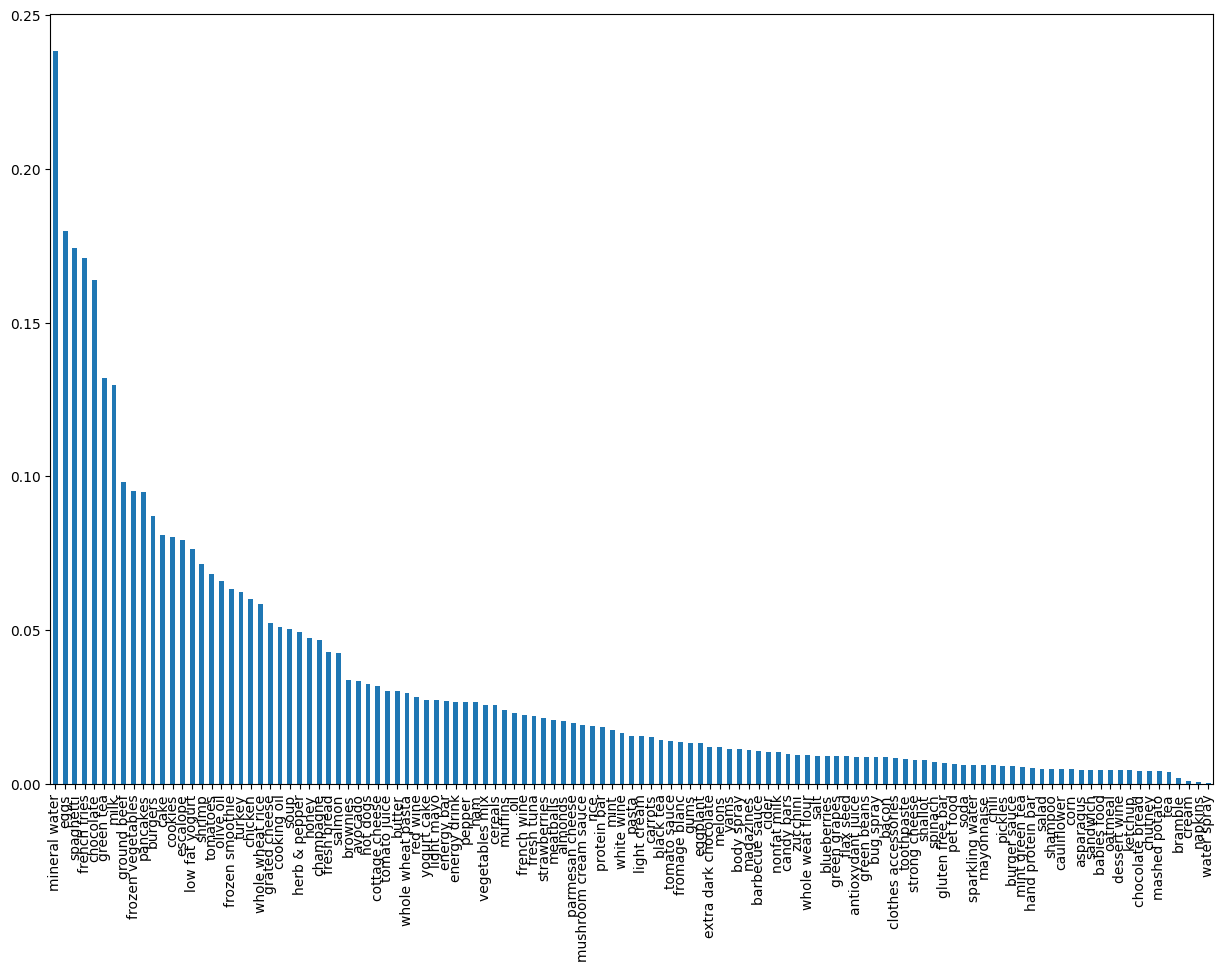

In [56]:
one_hot.mean().sort_values(ascending=False).plot(kind="bar", figsize=(15,10))

In [69]:
#Compute items that sell at minimum in 0.001% of all orders placed in the month (min_support)
frequent_itemsets = apriori(one_hot, min_support = 0.01,max_len = 2, use_colnames = True)

In [66]:
print(frequent_itemsets.head())

    support         itemsets
0  0.132116      (green tea)
1  0.238368  (mineral water)
2  0.179709           (eggs)
3  0.129583           (milk)
4  0.170911   (french fries)


In [70]:
#Compute pairs of orders that have a meaningful lift of more than 1 in their sales when marketed together
# frequent_itemsets_rules = association_rules(frequent_itemsets,metric = "lift", min_threshold = 1.0, num_itemsets=2)
frequent_itemsets_rules = association_rules(frequent_itemsets,metric = "lift", min_threshold =  1.0, num_itemsets=2)

In [71]:
frequent_itemsets_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,1.0,0.002025,1.033747,0.190170,0.059681,0.032645,0.123614
1,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,1.0,0.002025,1.016780,0.203462,0.059681,0.016503,0.123614
2,(shrimp),(mineral water),0.071457,0.238368,0.023597,0.330224,1.385352,1.0,0.006564,1.137144,0.299568,0.082441,0.120604,0.214609
3,(mineral water),(shrimp),0.238368,0.071457,0.023597,0.098993,1.385352,1.0,0.006564,1.030562,0.365218,0.082441,0.029655,0.214609
4,(shrimp),(eggs),0.071457,0.179709,0.014131,0.197761,1.100450,1.0,0.001290,1.022502,0.098306,0.059618,0.022007,0.138198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,(cake),(pancakes),0.081056,0.095054,0.011865,0.146382,1.539983,1.0,0.004160,1.060129,0.381571,0.072240,0.056719,0.135603
302,(ground beef),(grated cheese),0.098254,0.052393,0.011332,0.115332,2.201294,1.0,0.006184,1.071145,0.605183,0.081340,0.066419,0.165809
303,(grated cheese),(ground beef),0.052393,0.098254,0.011332,0.216285,2.201294,1.0,0.006184,1.150605,0.575895,0.081340,0.130892,0.165809
304,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,1.0,0.011138,1.332860,0.732460,0.121457,0.249734,0.243136


In [61]:
# Sort the DataFrame by the 'lift' column in descending order
sorted_rules = frequent_itemsets_rules.sort_values(by='lift', ascending=False)

# Display the sorted DataFrame
# print(sorted_rules)
print(sorted_rules.to_string(index=False))

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [62]:
frequent_itemsets_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [63]:
filtered_rules = frequent_itemsets_rules[
    frequent_itemsets_rules['antecedents'].apply(lambda x: 'fromage blanc' in x) & 
    frequent_itemsets_rules['consequents'].apply(lambda x: 'honey' in x)
]

print(filtered_rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [64]:
filtered_rules = frequent_itemsets_rules[
    frequent_itemsets_rules['antecedents'].apply(lambda x: 'light cream' in x) & 
    frequent_itemsets_rules['consequents'].apply(lambda x: 'chicken' in x)
]

print(filtered_rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
